<a href="https://colab.research.google.com/github/Astryon/final_project/blob/main/Pandas_Lovers_Holiday_Package_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Holiday Package Prediction**
Pandas Lovers <br>
Data Science Batch 32

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **PREPARATION**

**DATASET : HOLIDAY PACKAGE PREDICTION**

**1. PROBLEM STATEMENT**

Perusahaan traveling 'Trips & Travel.Com' membuat penawaran paket liburan terbaru. Agar lebih efektif, perusahaan ingin menyelesaikan permasalahan yang ada.
- Pada tahun lalu, hanya 18% pelanggan yang membeli paket liburan yang ditawarkan.
- Revenue perusahaan tidak mengalami peningkatan yang signifikan.

**2. GOAL**

Untuk menaikkan convertion rate dan revenue perusahaan.

**3. OBJECTIVE**

Membuat model untuk memprediksi pelanggan yang akan membeli paket liburan terbaru.

**4. BUSINESS METRICS**
- Total revenue 
- convertion rate

**IMPORT LIBRARY**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import re 
import matplotlib.patches
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [49]:
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.7.1
0.12.2
1.5.3


**IMPORT DATASET**

In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/JodhiKrisantus/DATASET/main/Travel.csv")
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# **EDA, INSIGHT & VISUALIZATION**

## **1. Descriptive Statistics**

**QUICK LOOK**

In [ ]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4463,204463,0,35.0,Self Enquiry,1,15.0,Small Business,Fe Male,4,4.0,Deluxe,3.0,Unmarried,5.0,0,4,0,2.0,Manager,24820.0
3846,203846,0,32.0,Self Enquiry,1,NaN,Small Business,Female,3,6.0,Basic,3.0,Married,3.0,1,5,1,1.0,Executive,19807.0
780,200780,1,28.0,Company Invited,1,30.0,Large Business,Male,3,4.0,Standard,5.0,Unmarried,2.0,0,2,0,0.0,Senior Manager,23722.0
3762,203762,0,30.0,Company Invited,1,27.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,3,1,2.0,Executive,22490.0
2483,202483,0,34.0,Company Invited,3,7.0,Salaried,Female,3,3.0,Deluxe,5.0,Divorced,4.0,0,3,1,1.0,Manager,24054.0


In [ ]:
# cek kesesuaian tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
# cek kolom kosong
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**CHECK DATA DUPLIKAT dan MISSING VALUE**

In [ ]:
print('Banyak data dan kolom : ',df.shape)
print('Jumlah ID Customer duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah data duplikat',df.duplicated().sum())

Banyak data dan kolom :  (4888, 20)
Jumlah ID Customer duplikat :  0
Jumlah data duplikat 0


In [ ]:
mv=df.isnull().sum()
tmv=df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv], axis=1)
mdf.columns=['Missing Value Total', 'Missing Value Percentage (%)']
mdf

,Missing Value Total,Missing Value Percentage (%)
CustomerID,0,0.000000
ProdTaken,0,0.000000
Age,226,4.623568
TypeofContact,25,0.511457
CityTier,0,0.000000
DurationOfPitch,251,5.135025
Occupation,0,0.000000
Gender,0,0.000000
NumberOfPersonVisiting,0,0.000000
NumberOfFollowups,45,0.920622


<Axes: >

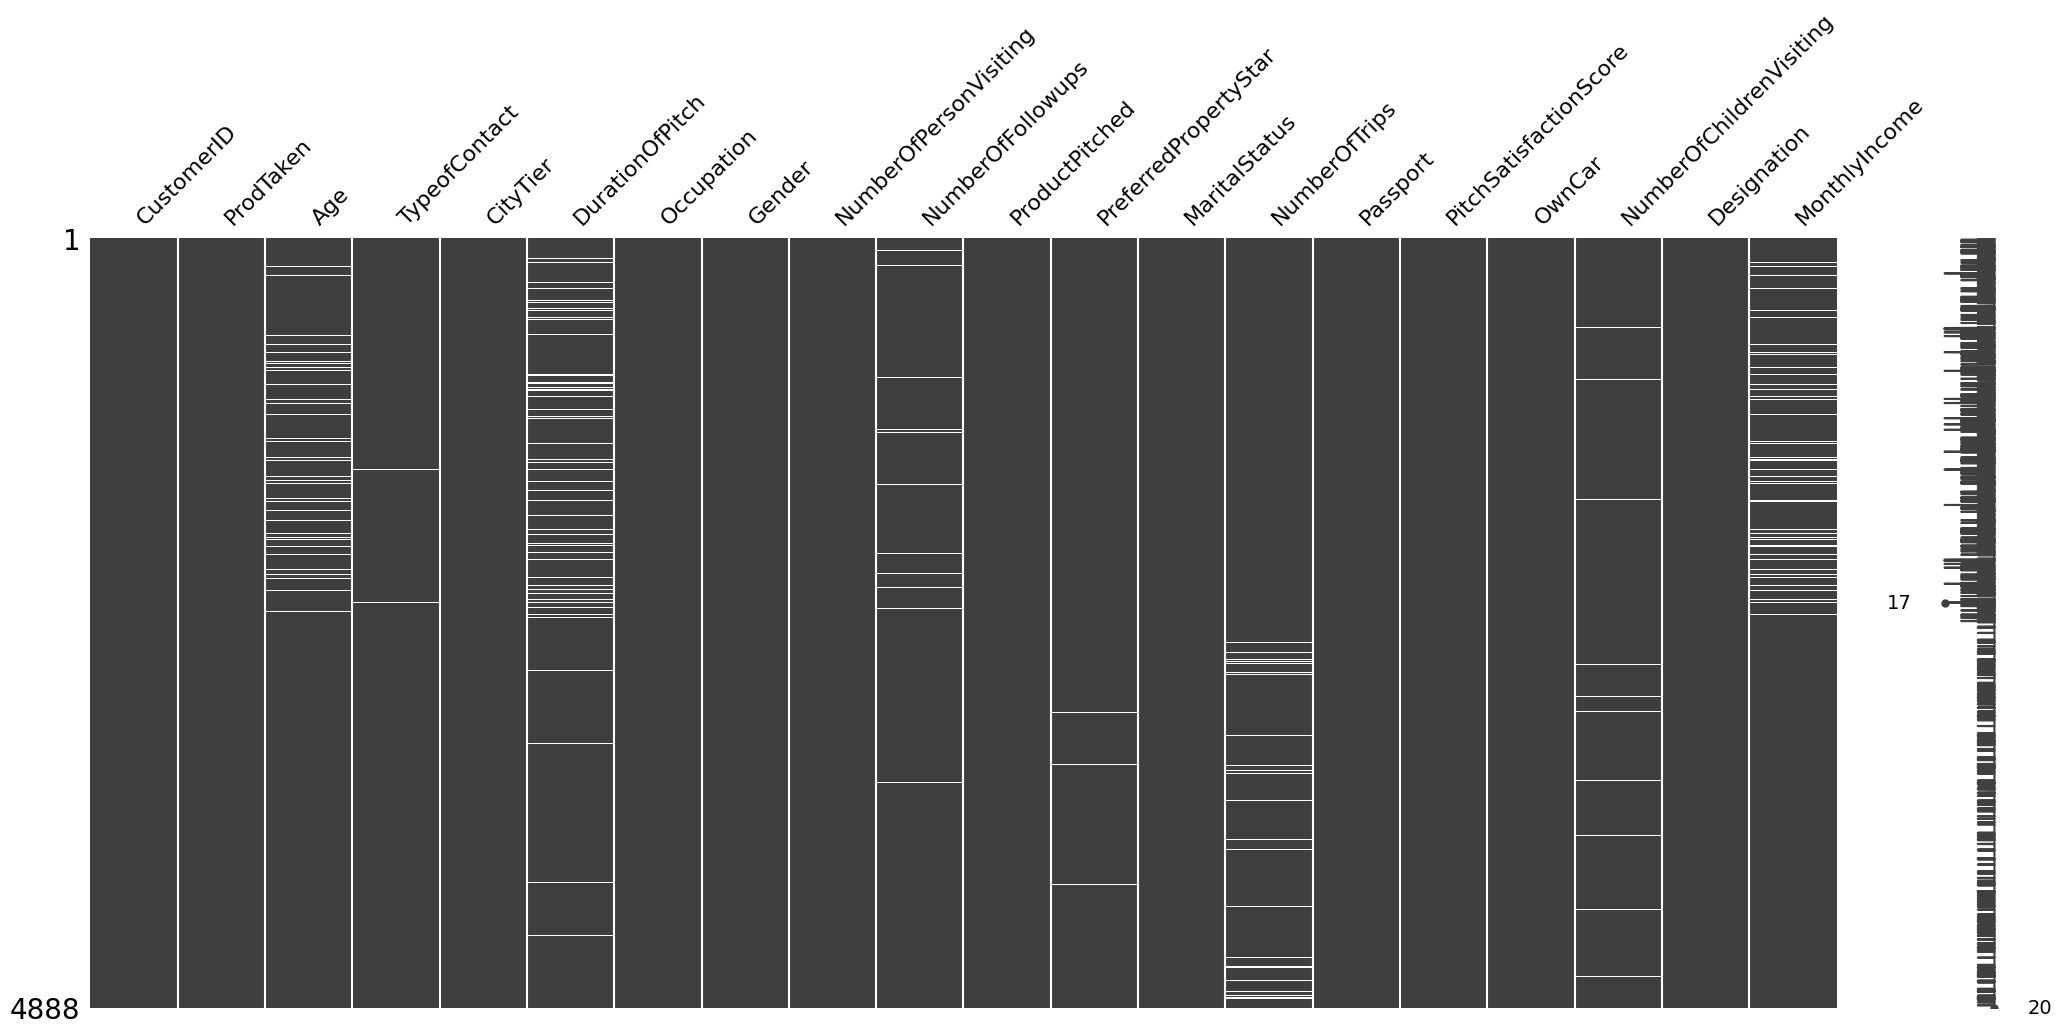

In [ ]:
import missingno as msno
msno.matrix(df)

In [23]:
# pengelompokan kolom berdasarkan jenisnya
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num         = ['Age','DurationOfPitch','MonthlyIncome']
diskrit     = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
              'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar', 'NumberOfChildrenVisiting']

In [ ]:
# cek nilai unik pada kolom categorical
for i in categorical:
    print(df[i].value_counts(), end="\n\n")

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



In [ ]:
# cek nilai summary
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
df[diskrit].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
OwnCar,4888.0,0.620295,0.485363,0.0,0.0,1.0,1.0,1.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0


In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [ ]:
df[categorical].describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa:

- Terdapat 6 kolom dengan tipe data yang kurang sesuai, yaitu kolom `NumberOfChildrenVisiting`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, dan `Age` yang bertipe data float, sehingga nantinya harus kita ubah menjadi tipe data integer.

- Terdapat 8 kolom yang memiliki missing value, yaitu kolom `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan `MonthlyIncome`. Kolom-kolom tersebut memiliki missing value < 10% sehingga dapat dikategorikan masih relatif aman.

- Pada kolom `NumberOfTrips`, terdapat nilai max = 22 dan min = 1. Sedangkan nilai mean (3.23) lebih besar dari median (3.0). Hal ini mengindikasikan data tersebar pada nilai-nilai yang memiliki value yang kecil, atau bisa disebut terdistribusi positive skewed.

- Kolom `MonthlyIncome` memiliki mean yang lebih besar dibandingkan nilai mediannya, yang mengindikasikan sebaran data tersebut yaitu positive skewed.

- Pada kolom `MonthlyIncome` pun terlihat memiliki standard deviation yang sangat tinggi, yang mengartikan terdapat data-data yang tersebar sangat jauh dari nilai rata-rata, yang kemungkinan menandakan adanya outlier.

- Tidak terdapat data yang duplikasi pada dataset ini.

- Terdapat kesalahan value pada kolom `Gender` yaitu adanya value 'Fe Male', yang nantinya harus kita handle pada saat pre-processing data.

- Pada kolom `MaritalStatus`, terdapat value yang memiliki arti sama yaitu value 'Single' dan 'Unmarried'.

## **2. Univariate Analysis**

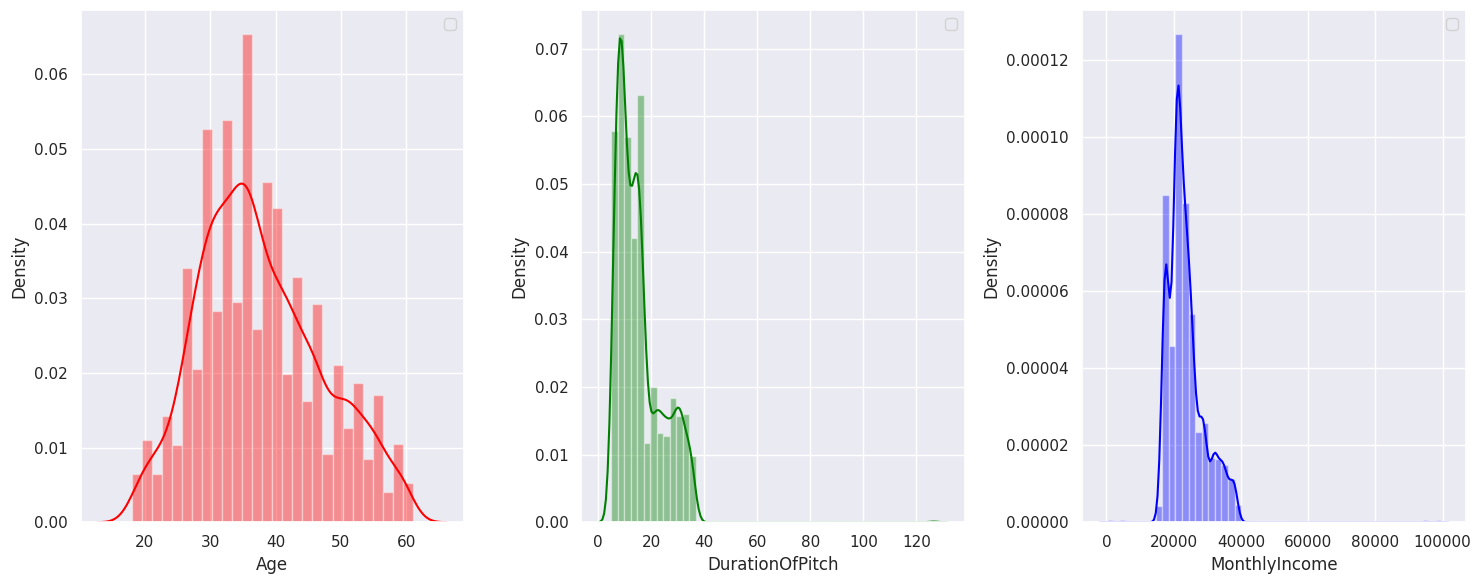

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.set_theme(style="darkgrid", palette="pastel")
colors = ['red', 'green', 'blue']

for i in range(len(num)):
    sns.distplot(df[num[i]], ax = axes[i], color=colors[i]) 
    axes[i].legend()

plt.tight_layout()
plt.show()

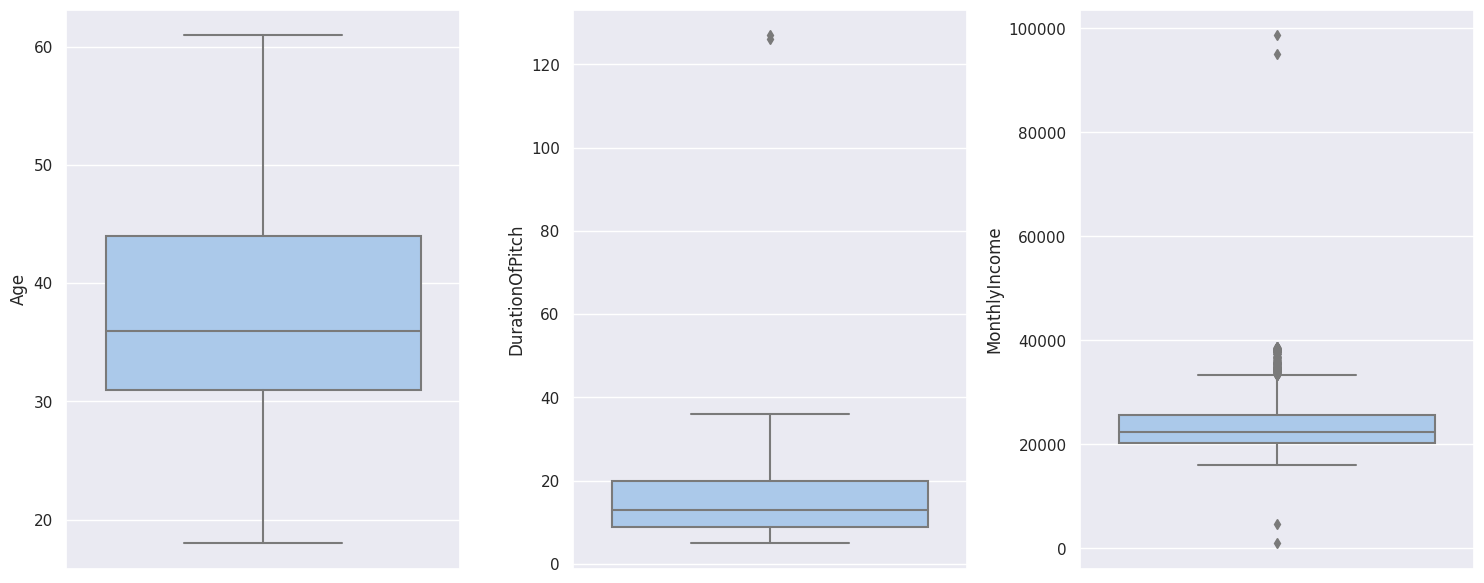

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
for i in range(len(num)):
    sns.boxplot(y=num[i], ax = axes[i], data=df)
plt.tight_layout()
plt.show()

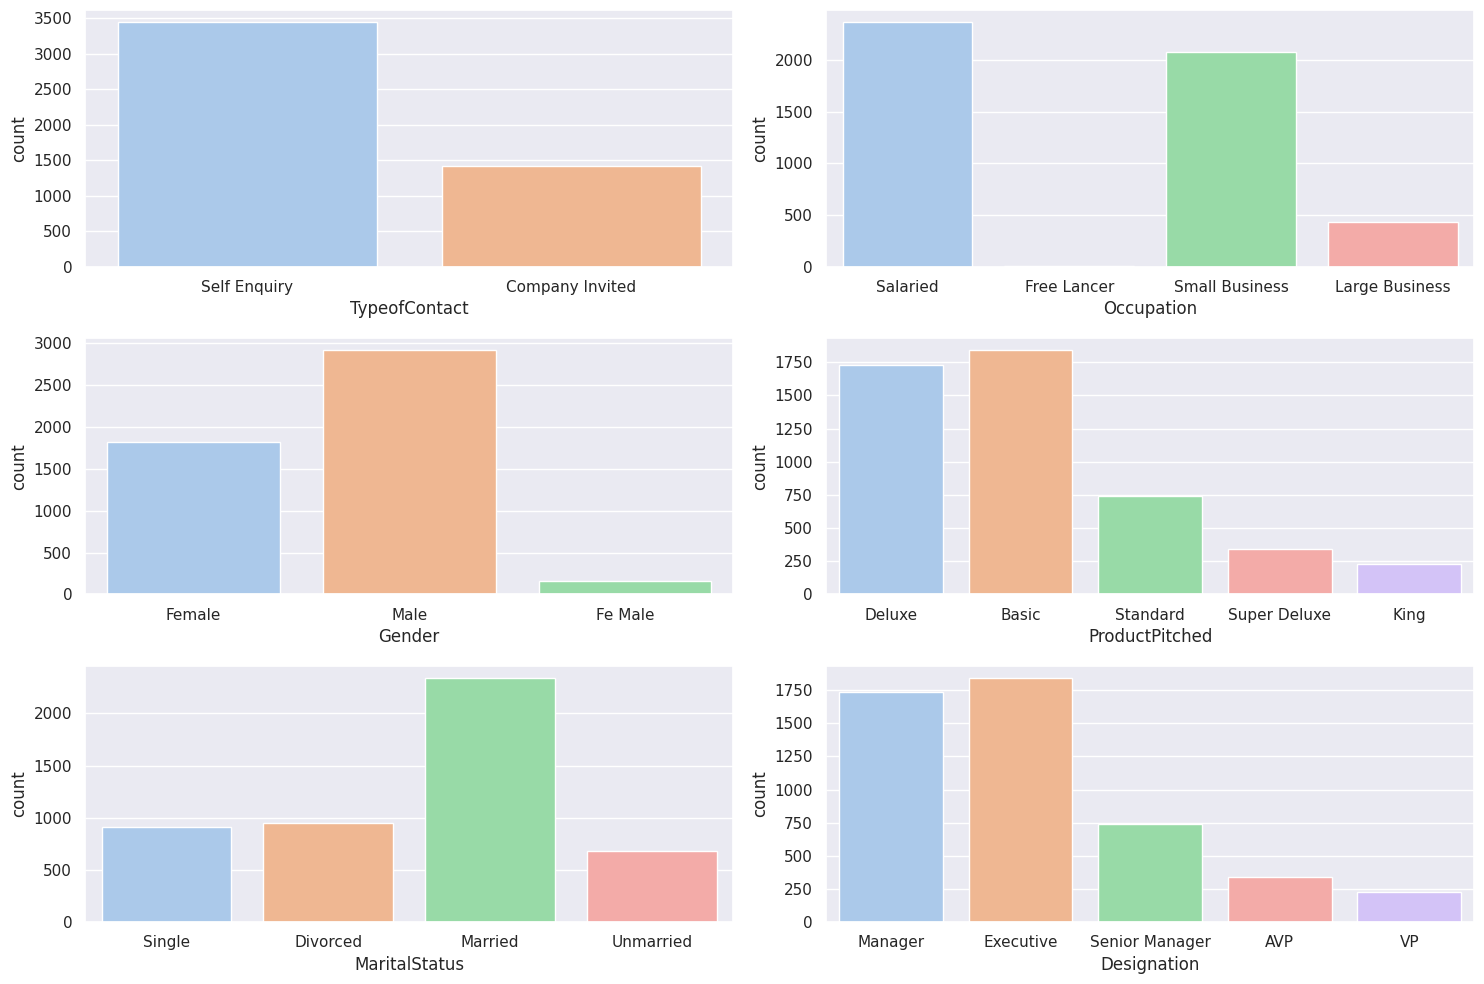

In [ ]:
# plot kolom categorical
plt.figure(figsize=(15,10))
for i in range (len(categorical)):
    plt.subplot(3,2, i+1)
    sns.countplot(data=df, x=categorical[i])
    sns.set_theme(style="darkgrid", palette="pastel")
plt.tight_layout()

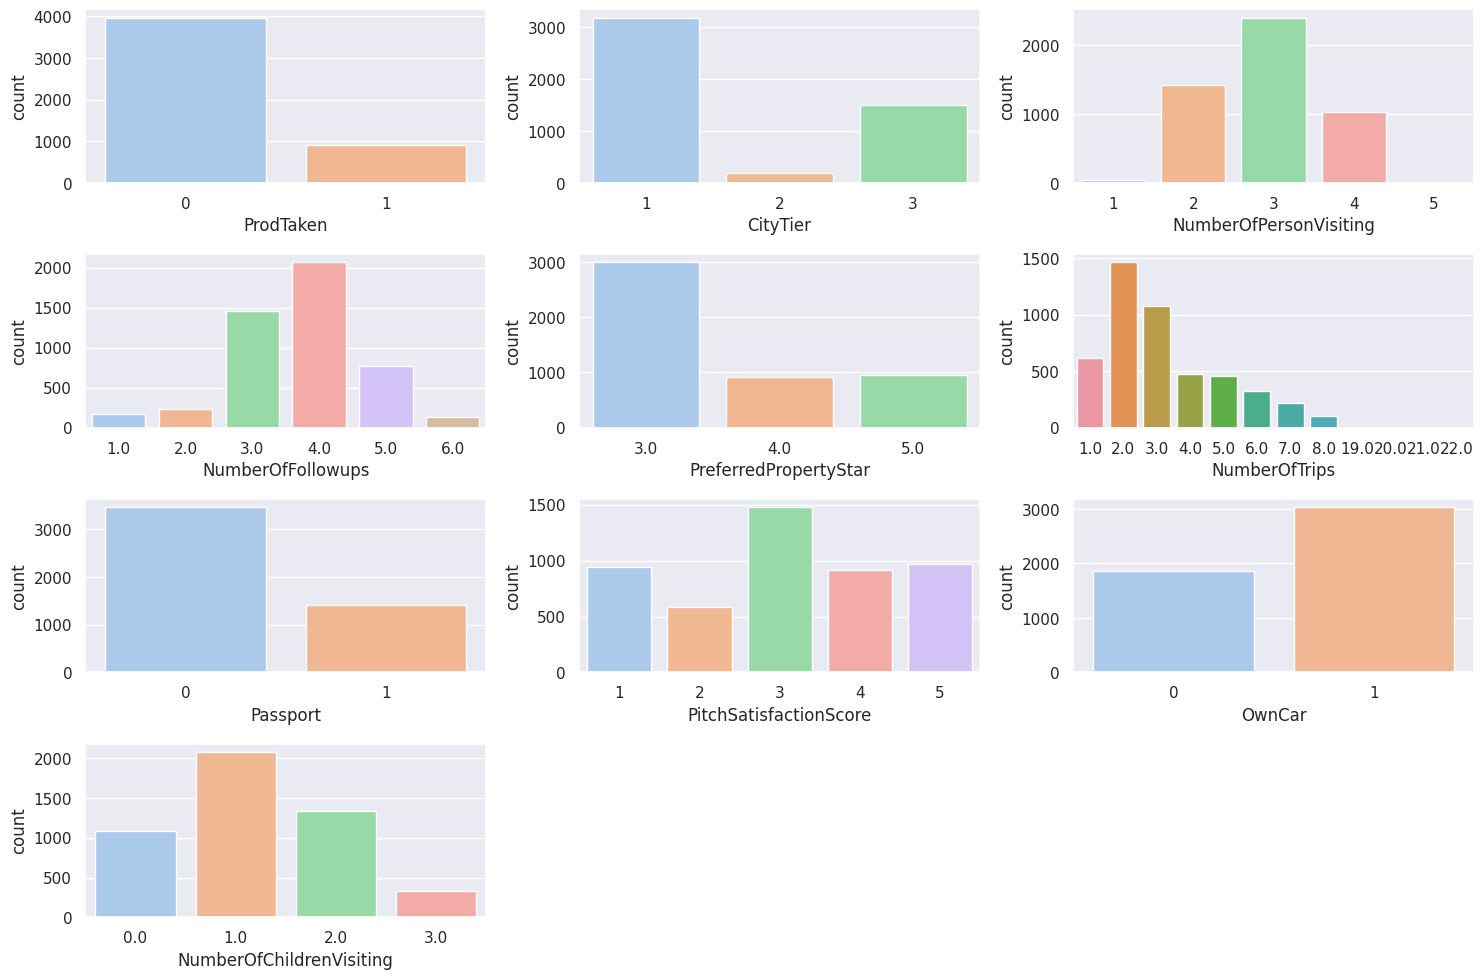

In [ ]:
# plot kolom diskrit
plt.figure(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3, i+1)
    sns.countplot(data=df, x=diskrit[i] )
    plt.tight_layout()

**HASIL OBSERVASI**

- Pada kolom `Age` distribusi datanya hampir mendekati normal.

- Pada kolom `DurationOfPitch` terlihat distribusinya positive skewed, dimana kebanyakan frekuensi data tersebar pada nilai < 20. Terlihat juga adanya outlier pada nilai > 120, sehingga nantinya akan kita ubah distribusinya menjadi normal pada saat pre-processing data.

- Pada kolom `MonthlyIncome` data tersebar pada nilai 20k-30k dan terdapat data outlier pada nilai < 10k dan > 80k. Sama seperti kolom `DurationOfPitch`, nantinya akan kita ubah distribusi datanya menjadi normal pada saat melakukan pre-processing data.

- Terdapat outlier pada kolom `NumberOfTrips`, dimana adanya nilai ekstrim yang mencapai < 19, sehingga nanti akan kita hilangkan outlier-nya pada saat pre-processing.

- Customer yang memiliki `Occupation` sebagai freelancer sangat sedikit (0,04%) jika dibandingkan dengan `Occupation` yang lain.

- Pada kolom target `ProdTaken`, terdapat class imbalance atau ketimpangan data, dimana customer yang mengambil paket liburan (ProdTaken = 1) memiliki frekuensi di bawah 1000. Sedangkan customer yang tidak mengambil paket wisata (ProdTaken = 0) berjumlah sangat dominan yaitu sekitar 4000 customer, sehingga ketimpangan data pada target harus diproses dengan undersampling atau oversampling pada saat data pre-processing nanti.

## **3. Multivariate Analysis**





<ipython-input-93-a80db9e78b66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')


<Axes: >

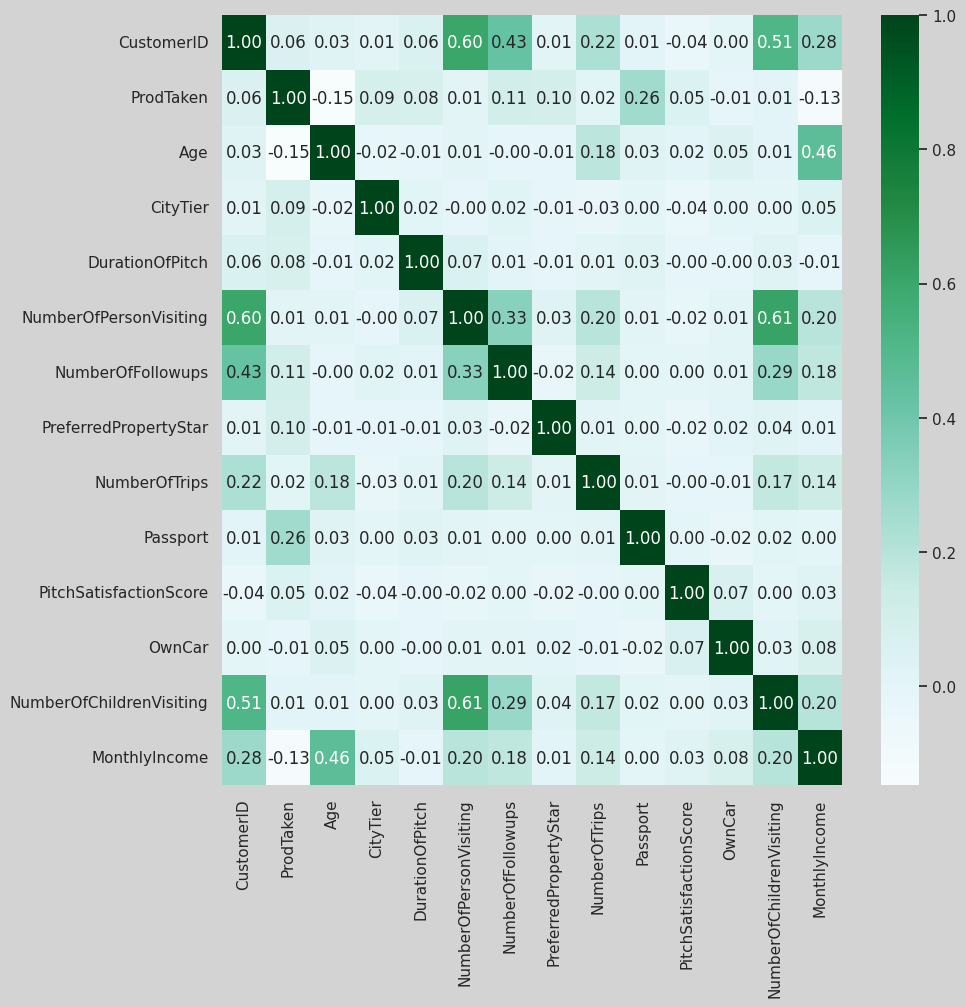

In [ ]:
plt.figure(figsize=(10,10), facecolor='lightgray')
sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')

<Figure size 2000x2000 with 0 Axes>

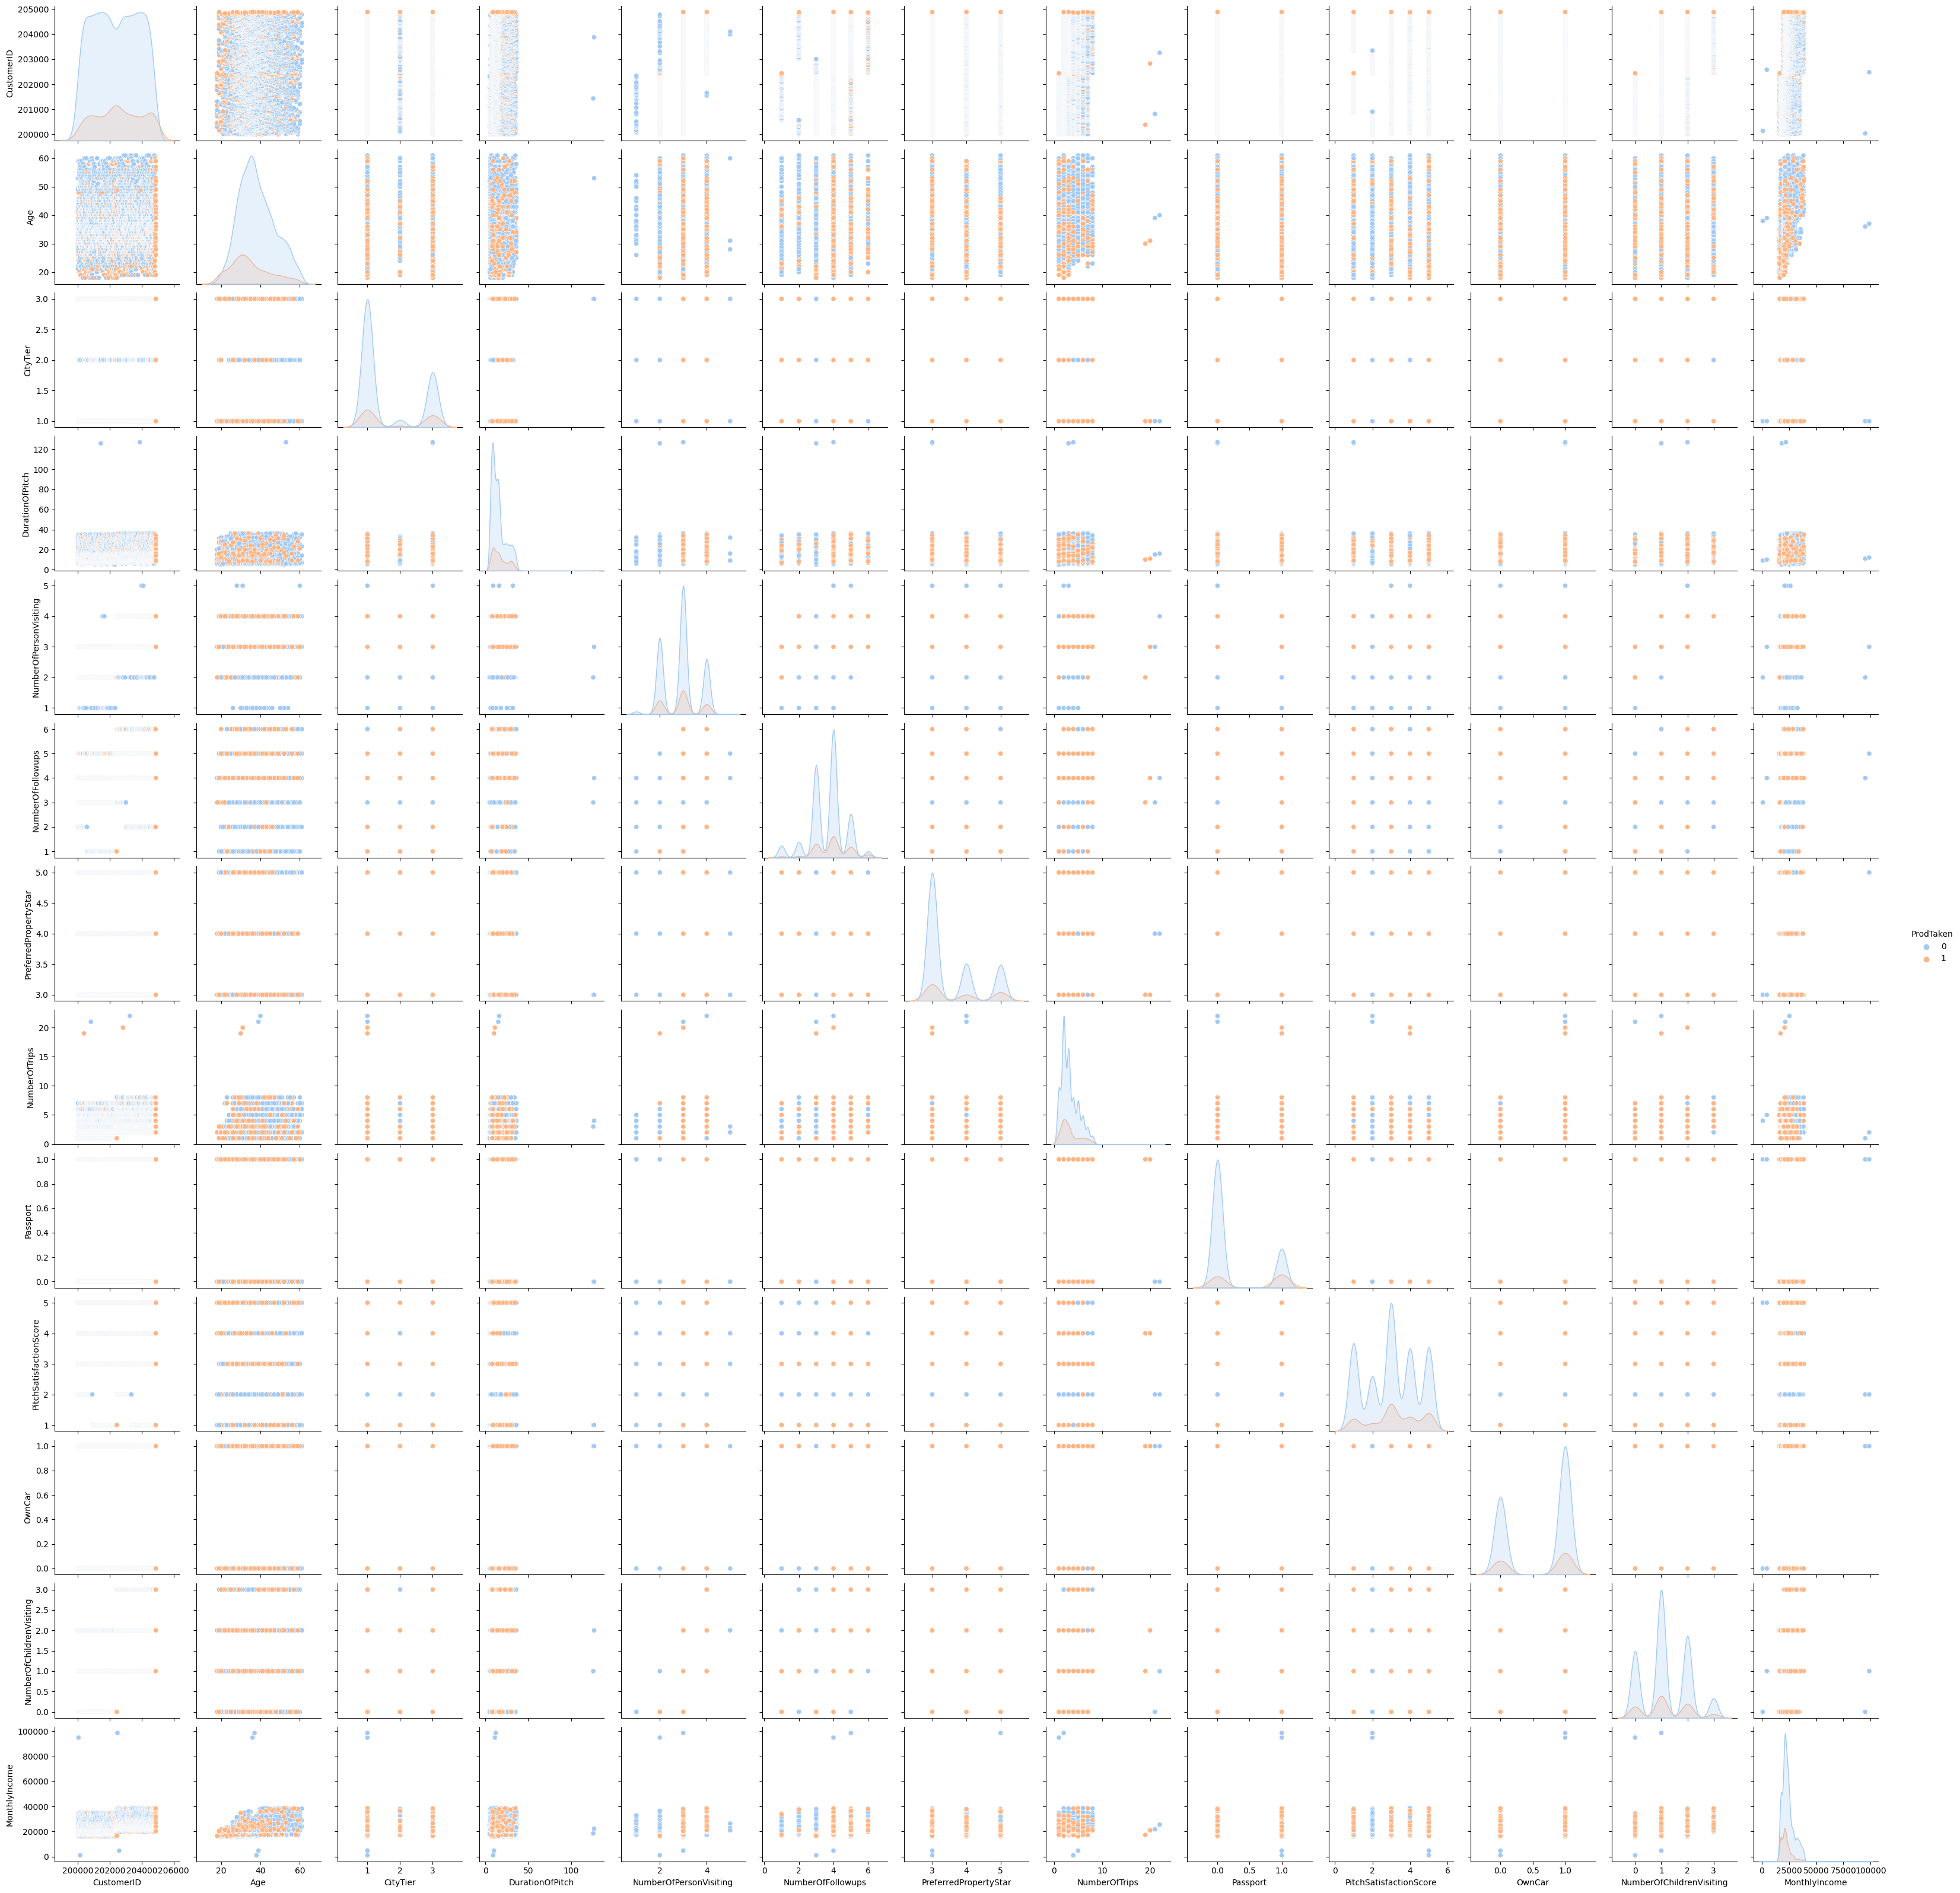

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='ProdTaken', palette='pastel')
plt.show()

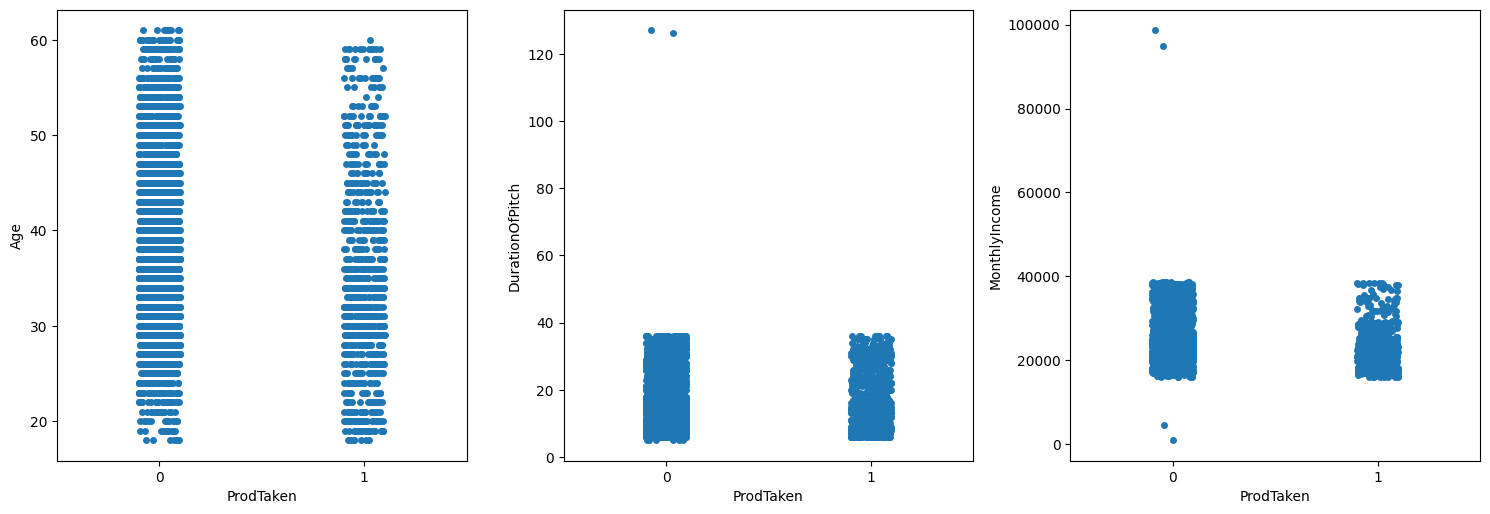

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='ProdTaken', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

**HASIL OBSERVASI**

- Dapat dilihat korelasi positif (walaupun lemah) pada variabel target kita yaitu `ProdTaken` dengan variabel `Passport`. Artinya semakin tinggi nilai passport customer (1), maka semakin tinggi pula nilai product taken-nya. Dengan kata lain, customer yang memiliki passport lebih cenderung membeli tawaran paket dibandingkan dengan customer yang tidak memiliki passport.

- Terdapat korelasi negatif antara variabel `Age` terhadap `ProdTaken` dan variabel `MonthlyIncome` terhadap `ProdTaken`, yang berarti semakin kecil nilai age atau monthly income-nya, maka semakin besar nilai product taken-nya. Dengan kata lain, customer yang berumur kecil/muda lebih cenderung membeli tawaran paket liburan dibandingkan dengan customer yang berumur tua, dan customer yang bergaji kecil cenderung membeli tawaran paket liburan dibandingkan dengan customer yang bergaji besar.

- Terdapat 2 fitur yang memiliki korelasi yang cukup kuat, yaitu `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` yang membentuk korelasi positif. Pada proses feature selection, kita dapat mengeliminasi fitur yang redundan (mempunyai informasi serupa) agar tidak terjadi overfitting pada model machine learning nantinya.

## **4. Business Insight**

### **1. Apakah kepemilikan Passport mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan?**

In [ ]:
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [ ]:
df_passport = df.groupby(['Passport','ProdTaken']).agg({'CustomerID' : ['nunique']}).reset_index()
df_passport.columns = ['Passport','ProdTaken','Total Customer']
df_passport

,Passport,ProdTaken,Total Customer
0,0,0,3040
1,0,1,426
2,1,0,928
3,1,1,494


In [ ]:
# menjumlahkan total customer per passport
df_passport1 = df_passport.groupby('Passport').agg({'Total Customer' : ['sum']}).reset_index()
df_passport1.columns = ['Passport','Total Customer per Passport']

# merge df yang tadi ke df yang lama
df_merge = df_passport.merge(df_passport1, on='Passport')

# membuat column baru yang berisikan persentase
df_merge['Percentage'] = round((df_merge['Total Customer'] / df_merge['Total Customer per Passport']) * 100,2)
df_merge

,Passport,ProdTaken,Total Customer,Total Customer per Passport,Percentage
0,0,0,3040,3466,87.71
1,0,1,426,3466,12.29
2,1,0,928,1422,65.26
3,1,1,494,1422,34.74


Text(0.8, 958, '928')

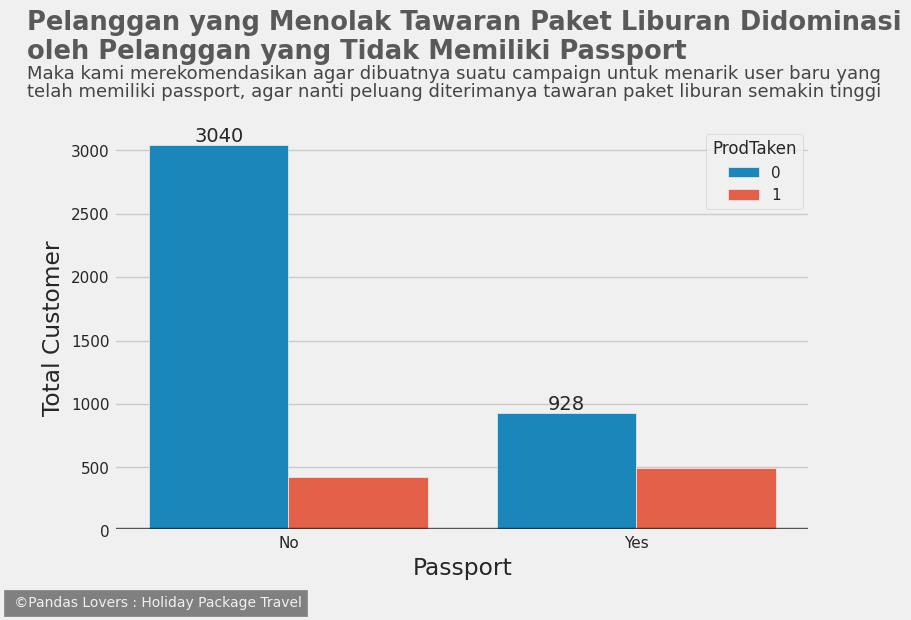

In [ ]:
# membuat grafik
style.use('fivethirtyeight')

plt.figure(figsize=(8,5))

sns.barplot(x='Passport',y='Total Customer',data=df_merge,hue='ProdTaken')

plt.text(x = 0-0.75, y = 3950,
          s = 'Pelanggan yang Menolak Tawaran Paket Liburan Didominasi', 
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3725,
          s = 'oleh Pelanggan yang Tidak Memiliki Passport', 
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3560,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru yang', 
         fontsize = 13, alpha = .85)
plt.text(x = 0-0.75, y = 3420,
         s = 'telah memiliki passport, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi', 
         fontsize = 13, alpha = .85)
plt.text(x = -0.80, y = -600,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

plt.axhline(y = 0, color = 'black', linewidth = 5.3, alpha = .7)


plt.xticks(ticks=[0,1], labels=['No','Yes'])


plt.text(x = 0-0.20, y = 3040+30, s = "3040", ha='center')
plt.text(x = 1-0.20, y = 928+30, s = "928", ha='center')

### **2. Apakah umur mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-0.8, -0.008, ' ©Pandas Lovers : Holiday Package Travel')

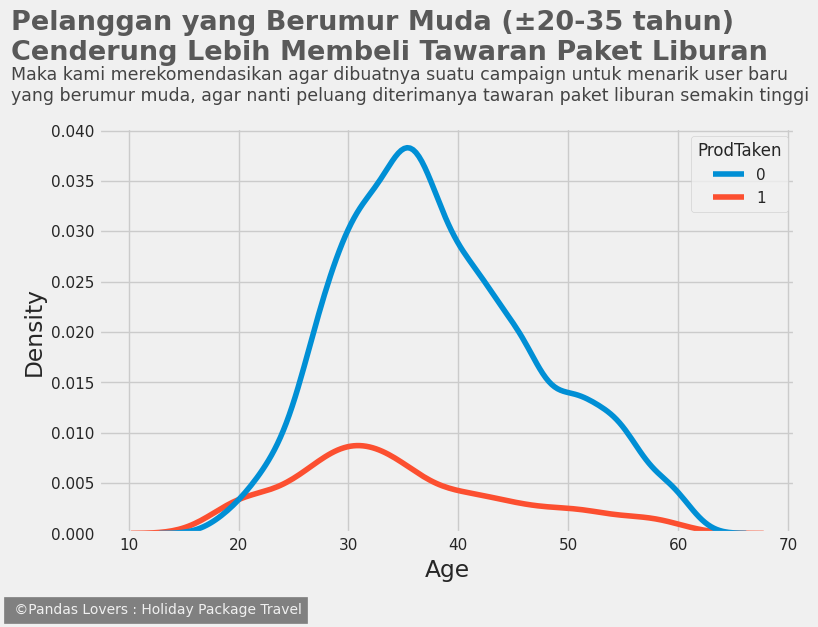

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', data=df, hue='ProdTaken')

plt.text(x = 0-0.75, y = 0.050,
          s = 'Pelanggan yang Berumur Muda (±20-35 tahun)', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.047,
          s = 'Cenderung Lebih Membeli Tawaran Paket Liburan', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.045,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-0.75, y = 0.043,
         s = 'yang berumur muda, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi', 
         fontsize = 12.5, alpha = .85)
plt.text(x = -0.80, y = -0.008,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

### **3. Apakah gaji mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-16000, -2e-05, ' ©Pandas Lovers : Holiday Package Travel')

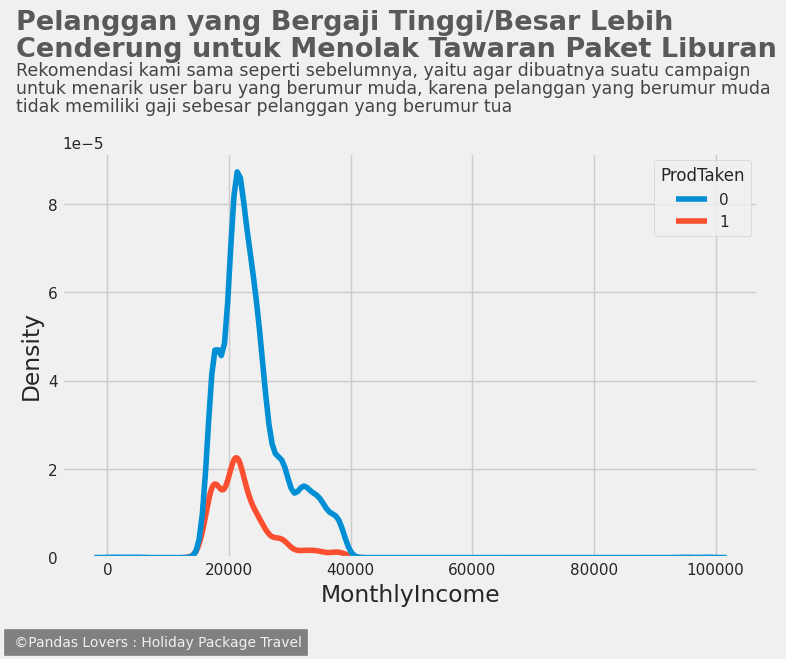

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='MonthlyIncome', data=df, hue='ProdTaken')
plt.text(x = 0-15000, y = 0.0001195,
          s = 'Pelanggan yang Bergaji Tinggi/Besar Lebih', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.0001135,
          s = 'Cenderung untuk Menolak Tawaran Paket Liburan', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.000109,
         s = 'Rekomendasi kami sama seperti sebelumnya, yaitu agar dibuatnya suatu campaign', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000105,
         s = 'untuk menarik user baru yang berumur muda, karena pelanggan yang berumur muda', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000101,
         s = 'tidak memiliki gaji sebesar pelanggan yang berumur tua', 
         fontsize = 12.5, alpha = .85)
plt.text(x = -16000, y = -0.00002,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

# **DATA PRE-PROCESSING**

1. Missing Value

In [85]:
df_new =df.copy()

In [86]:
# Data Missing
df_new.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Kolom yang tidak sesuai ada 9 karena nilainya kosong (Missing Valuenya ada 9) : Age (Ganti Mean), Typeofcontact (di drop), DurationOfPitch (median), NumberOfFollwups (modus), PreferredPropertyStar (drop), NumberOfTrips (drop) , NumberOfChildrenVisiting (drop), MonthlyIncome (median)

In [87]:
df_new.dropna(subset=['TypeofContact','NumberOfChildrenVisiting','PreferredPropertyStar','NumberOfTrips'], inplace=True)

In [88]:
df_new['Age'].fillna(df_new['Age'].mean(), inplace=True)
df_new['DurationOfPitch'].fillna(df_new['DurationOfPitch'].median(), inplace=True)
df_new['NumberOfFollowups'].fillna(df_new['NumberOfFollowups'].mode(), inplace=True)
df_new['MonthlyIncome'].fillna(df_new['MonthlyIncome'].median(), inplace=True)

2. Duplikat Data

In [54]:
# Data Duplikat

print('Banyak data dan kolom : ',df_new.shape)
print('Jumlah ID Customer duplikat : ',df_new['CustomerID'].duplicated().sum())
print('Jumlah data duplikat',df_new.duplicated().sum())

Banyak data dan kolom :  (4888, 20)
Jumlah ID Customer duplikat :  0
Jumlah data duplikat 0


Tidak ada Duplikat Data

In [89]:
df_new = df_new.replace('Fe Male', 'Female')

In [90]:
df_new['Gender'].value_counts()

Male      2765
Female    1866
Name: Gender, dtype: int64

In [91]:
df_new['MaritalStatus'].value_counts()

Married      2204
Divorced      886
Single        859
Unmarried     682
Name: MaritalStatus, dtype: int64

In [92]:
df_new['MaritalStatus'] = df_new['MaritalStatus'].replace(['Unmarried','Divorced'],'Single')

In [93]:
df_new['MaritalStatus'].value_counts()

Single     2427
Married    2204
Name: MaritalStatus, dtype: int64

3. Handling Outlier

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

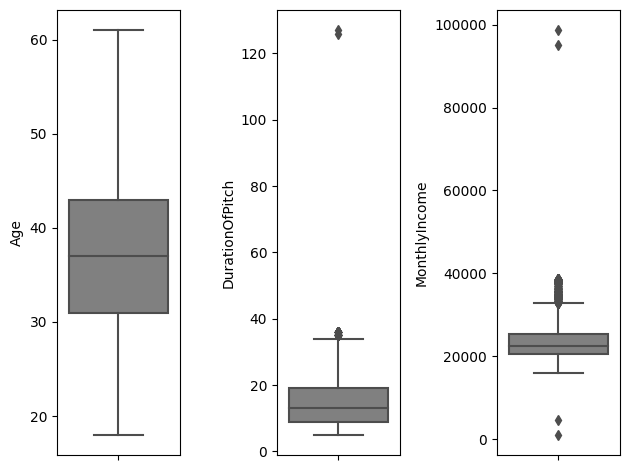

In [61]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df_new[num[i]], color='gray', orient='v')
    plt.tight_layout()

Terdapat Outlier dari MonthlyIncome, DurationOfPitch

In [94]:
# count column before outlier detection

print(f'Number of rows before filtering outliers:{len(df_new)}')

# outlier detection

i = ['Age', 'MonthlyIncome', 'DurationOfPitch' ]

#outlier detection using Quantile

Q1 = df_new[i].quantile(0.25)
Q3 = df_new[i].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

df_new = df_new[~((df_new[i] < lower_limit) | (df_new[i] > upper_limit)).any(axis=1)]

# outlier detection using Z-Score

#z = np.abs(stats.zscore(df_new[i]))
#df_new = df_new[(z < 3).all(axis=1)]


print(f'Number of rows after filtering outliers using Quantile:{len(df_new)}')

Number of rows before filtering outliers:4631
Number of rows after filtering outliers using Quantile:4196


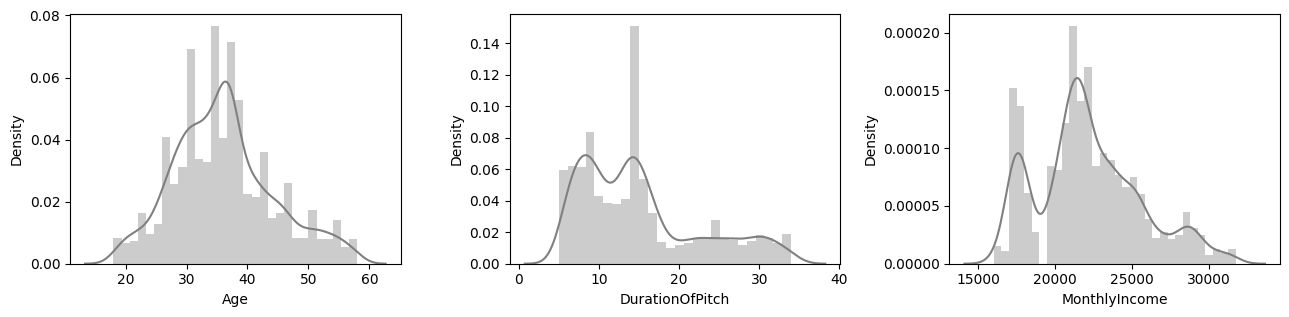

In [77]:
# show data distribution after outlier detection

plt.figure(figsize=(13, 9))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df_new[num[i]], color='gray')
    plt.tight_layout()

In [95]:
df_new['MonthlyIncome'] = MinMaxScaler().fit_transform(df_new['MonthlyIncome'].values.reshape(len(df_new), 1))
df_new['DurationOfPitch'] = MinMaxScaler().fit_transform(df_new['DurationOfPitch'].values.reshape(len(df_new), 1))
df_new['Age'] = StandardScaler().fit_transform(df_new['Age'].values.reshape(len(df_new), 1))

In [97]:
df_new.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4196.000000,4196.000000,4.196000e+03,4196.000000,4196.000000,4196.000000,4153.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000
mean,202397.089371,0.198522,6.731190e-16,1.661106,0.346216,2.889418,3.688177,3.580076,3.193756,0.293851,3.053622,0.609390,1.170400,0.391702
std,1408.930322,0.398935,1.000119e+00,0.920187,0.257897,0.724950,1.006385,0.794212,1.844457,0.455579,1.364013,0.487945,0.856464,0.214849
min,200000.000000,0.000000,-2.194630e+00,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,201182.500000,0.000000,-7.383831e-01,1.000000,0.137931,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.259351
50%,202350.500000,0.000000,-1.025936e-02,1.000000,0.310345,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,0.369213
75%,203630.250000,0.000000,5.965104e-01,3.000000,0.448276,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,0.515940
max,204887.000000,1.000000,2.659528e+00,3.000000,1.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,1.000000


In [99]:
# onehots encoder pada Occupation dan TypeofContact
for cat in ['Occupation','TypeofContact']:
  onehots = pd.get_dummies(df_new[cat], prefix=cat)
  df_new = df_new.join(onehots)

ValueError: ignored

In [100]:
df_new['ProductPitched'].value_counts()

Basic           1772
Deluxe          1635
Standard         669
Super Deluxe     118
King               2
Name: ProductPitched, dtype: int64

In [101]:
#membuat function grouping
def product(x):
    if x['ProductPitched'] == 'Basic':
        product = 0
    if x['ProductPitched'] == 'Standard':
        product = 1
    if x['ProductPitched'] == 'Deluxe':
        product = 2
    if x['ProductPitched'] == 'Super Deluxe':
        product = 3
    if x['ProductPitched'] == 'King':
        product = 4
    return product

In [102]:
#menjalankan function grouping
df_new['ProductPitched'] = df_new.apply(lambda x: product(x), axis=1)

In [103]:
#membuat function MaritalStatus
def status(x):
    if x['MaritalStatus'] == 'Single':
        status = 0
    else:
        status = 1
    return status

#membuat kolom baru bernama 'IsMarried' yang menjalankan function grouping
df_new['IsMarried'] = df_new.apply(lambda x: status(x), axis=1)

In [104]:
#membuat function grouping
def group(x):
    if x['Designation'] == 'Executive':
        group = 0
    if x['Designation'] == 'Manager':
        group = 1
    if x['Designation'] == 'Senior Manager':
        group = 2
    if x['Designation'] == 'AVP':
        group = 3
    if x['Designation'] == 'VP':
        group = 4
    return group

In [105]:
df_new['Designation'] = df_new.apply(lambda x: group(x), axis=1)
df_new.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,TypeofContact_Company Invited,TypeofContact_Self Enquiry,IsMarried
4882,204882,1,0.111095,Self Enquiry,2,0.517241,Salaried,Male,3,5.0,...,2.0,0,0.464088,0,0,1,0,0,1,1
4883,204883,1,1.567342,Self Enquiry,3,0.137931,Small Business,Male,3,5.0,...,1.0,1,0.671048,0,0,0,1,0,1,0
4884,204884,1,-0.981091,Company Invited,1,0.896552,Salaried,Male,4,5.0,...,2.0,0,0.330412,0,0,1,0,1,0,0
4886,204886,1,-2.073277,Self Enquiry,3,0.379310,Small Business,Male,3,4.0,...,2.0,0,0.271798,0,0,0,1,0,1,0
4887,204887,1,-0.010259,Self Enquiry,1,0.310345,Salaried,Male,4,4.0,...,2.0,0,0.510065,0,0,1,0,0,1,0


In [108]:
df_new['Sales_Conversion_Rate'] = round( df_new['ProdTaken'] / df_new['NumberOfFollowups']*100,2)

<Axes: >

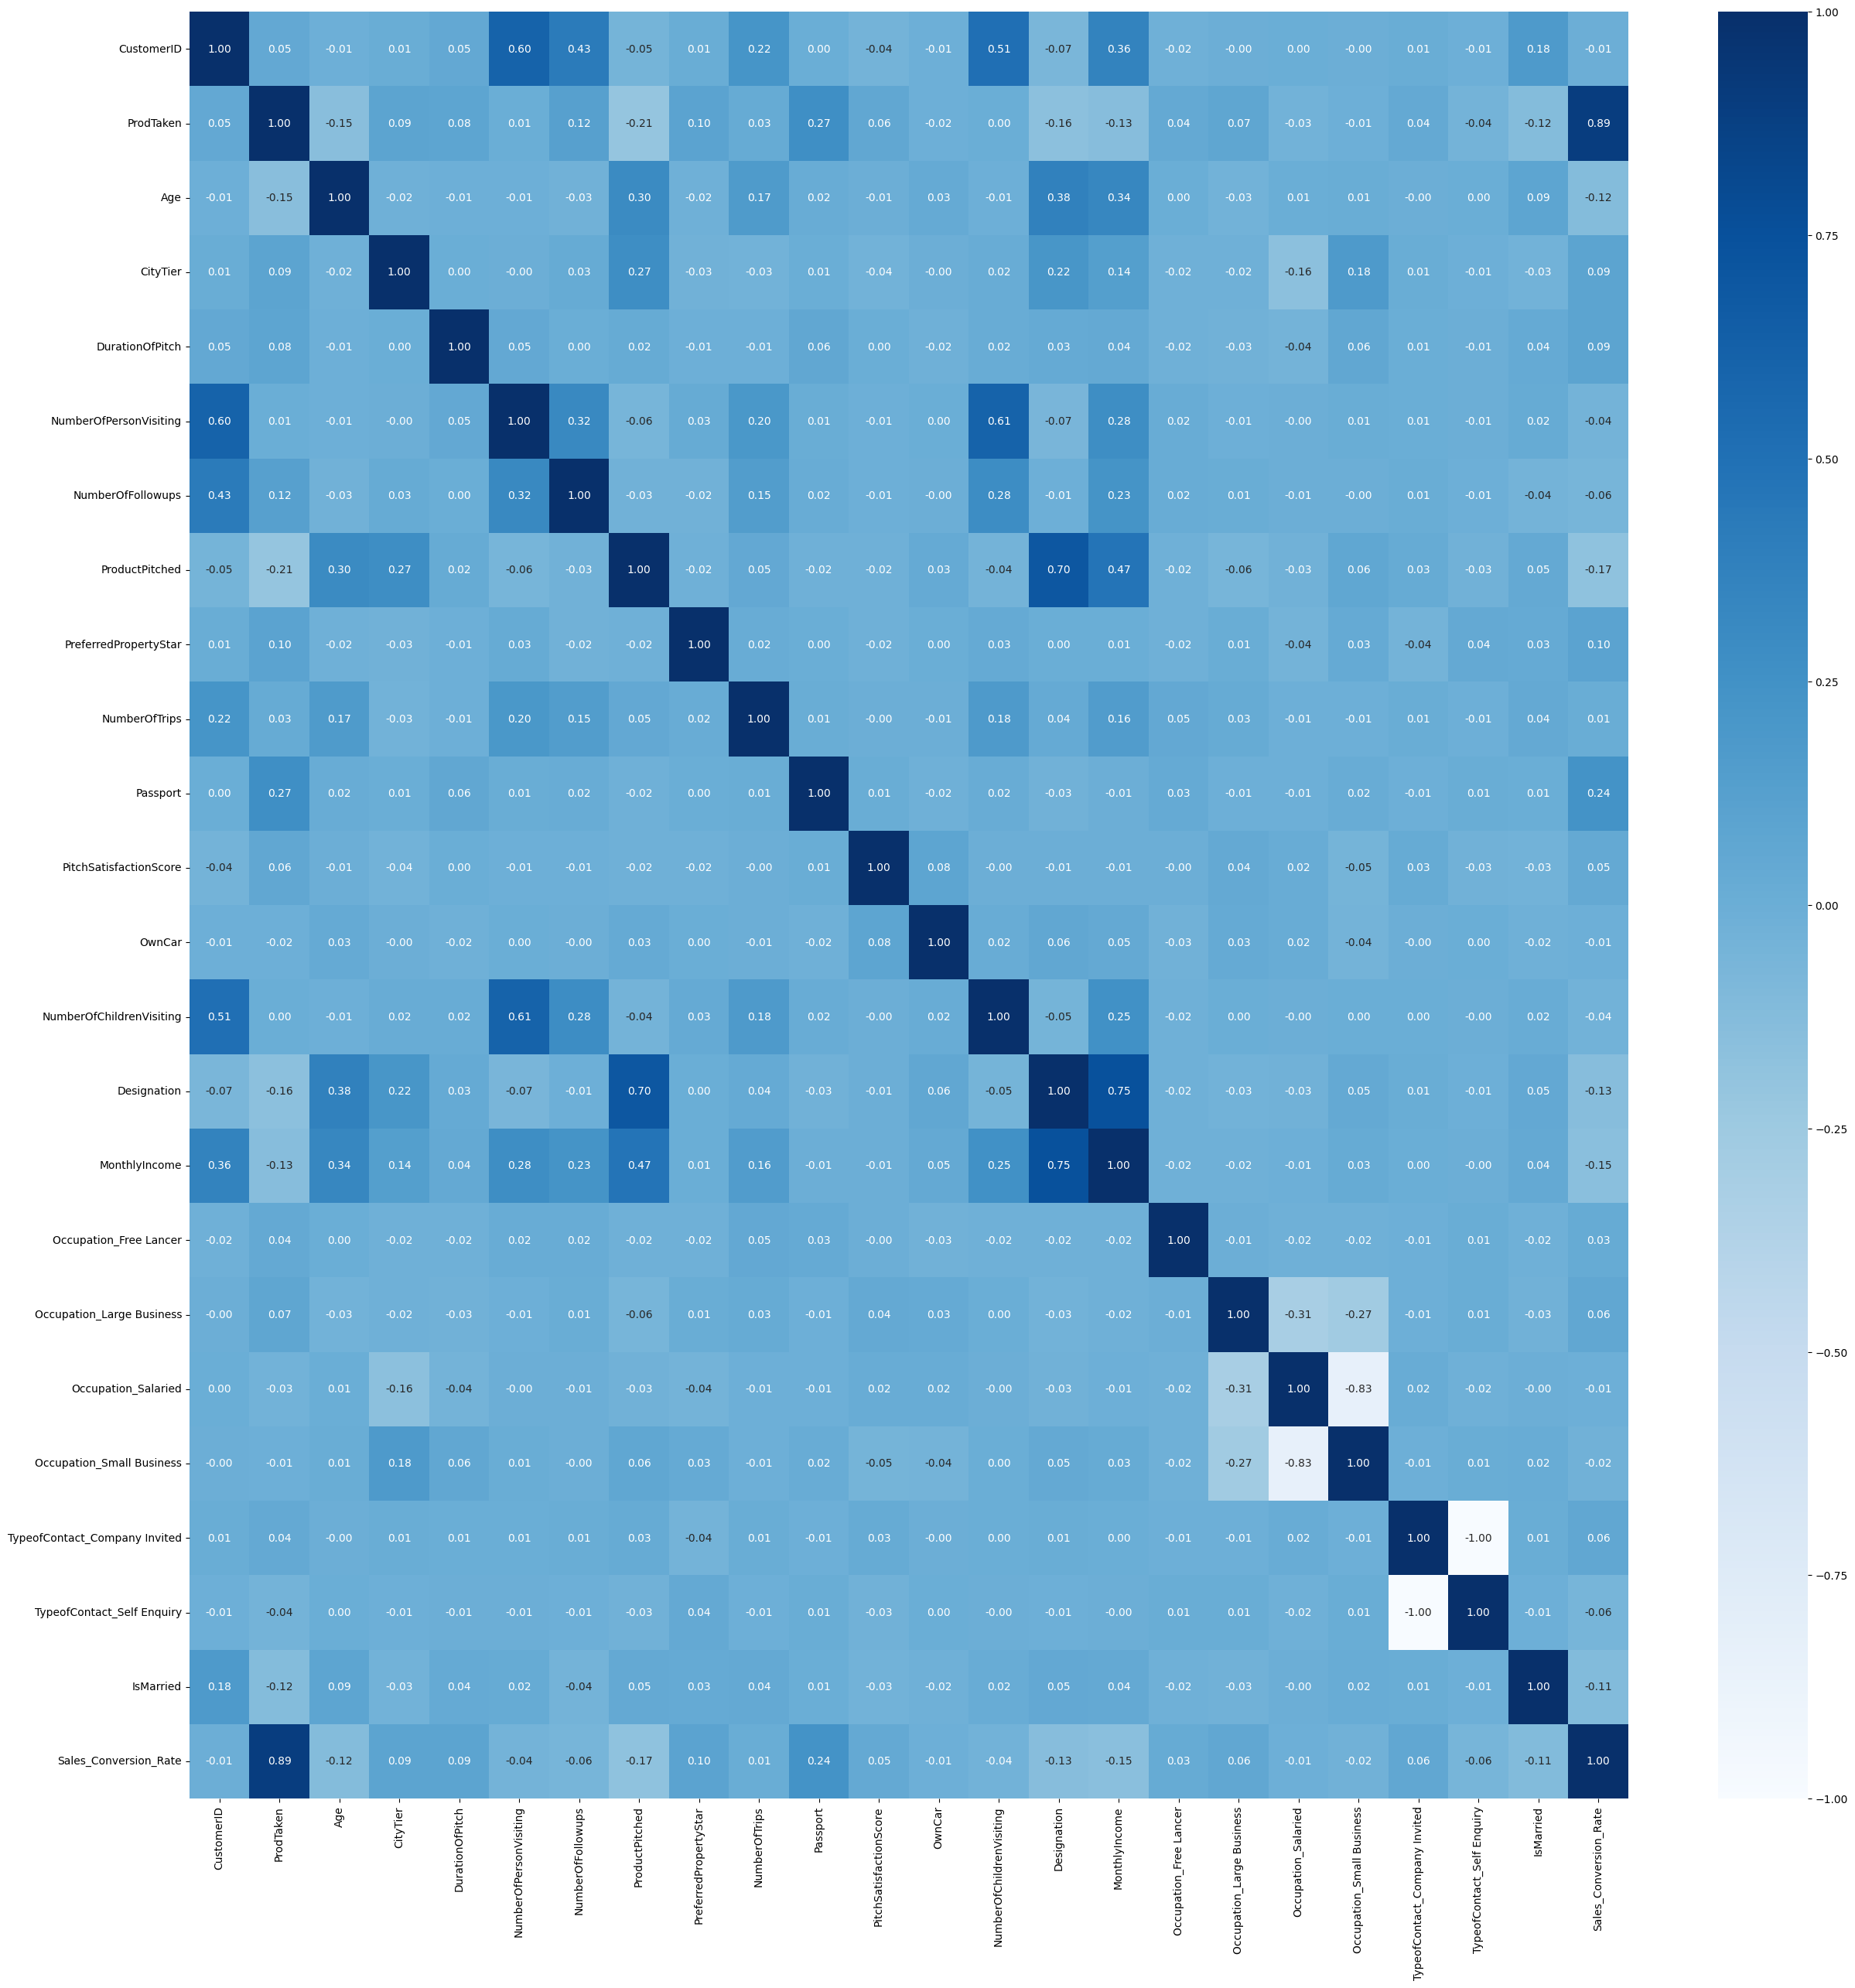

In [109]:
#Korelasi

plt.figure(figsize=(30, 30))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [117]:
df_drop = df_new.drop(columns=['CustomerID','Occupation','TypeofContact','MaritalStatus','NumberOfPersonVisiting',
                         'NumberOfTrips','NumberOfChildrenVisiting', 'DurationOfPitch', 'OwnCar', 'PitchSatisfactionScore', 'Designation', 'Occupation_Salaried', 'CityTier', 'Occupation_Large Business', 'Occupation_Free Lancer', 'Occupation_Small Business', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry']).copy()



<Axes: >

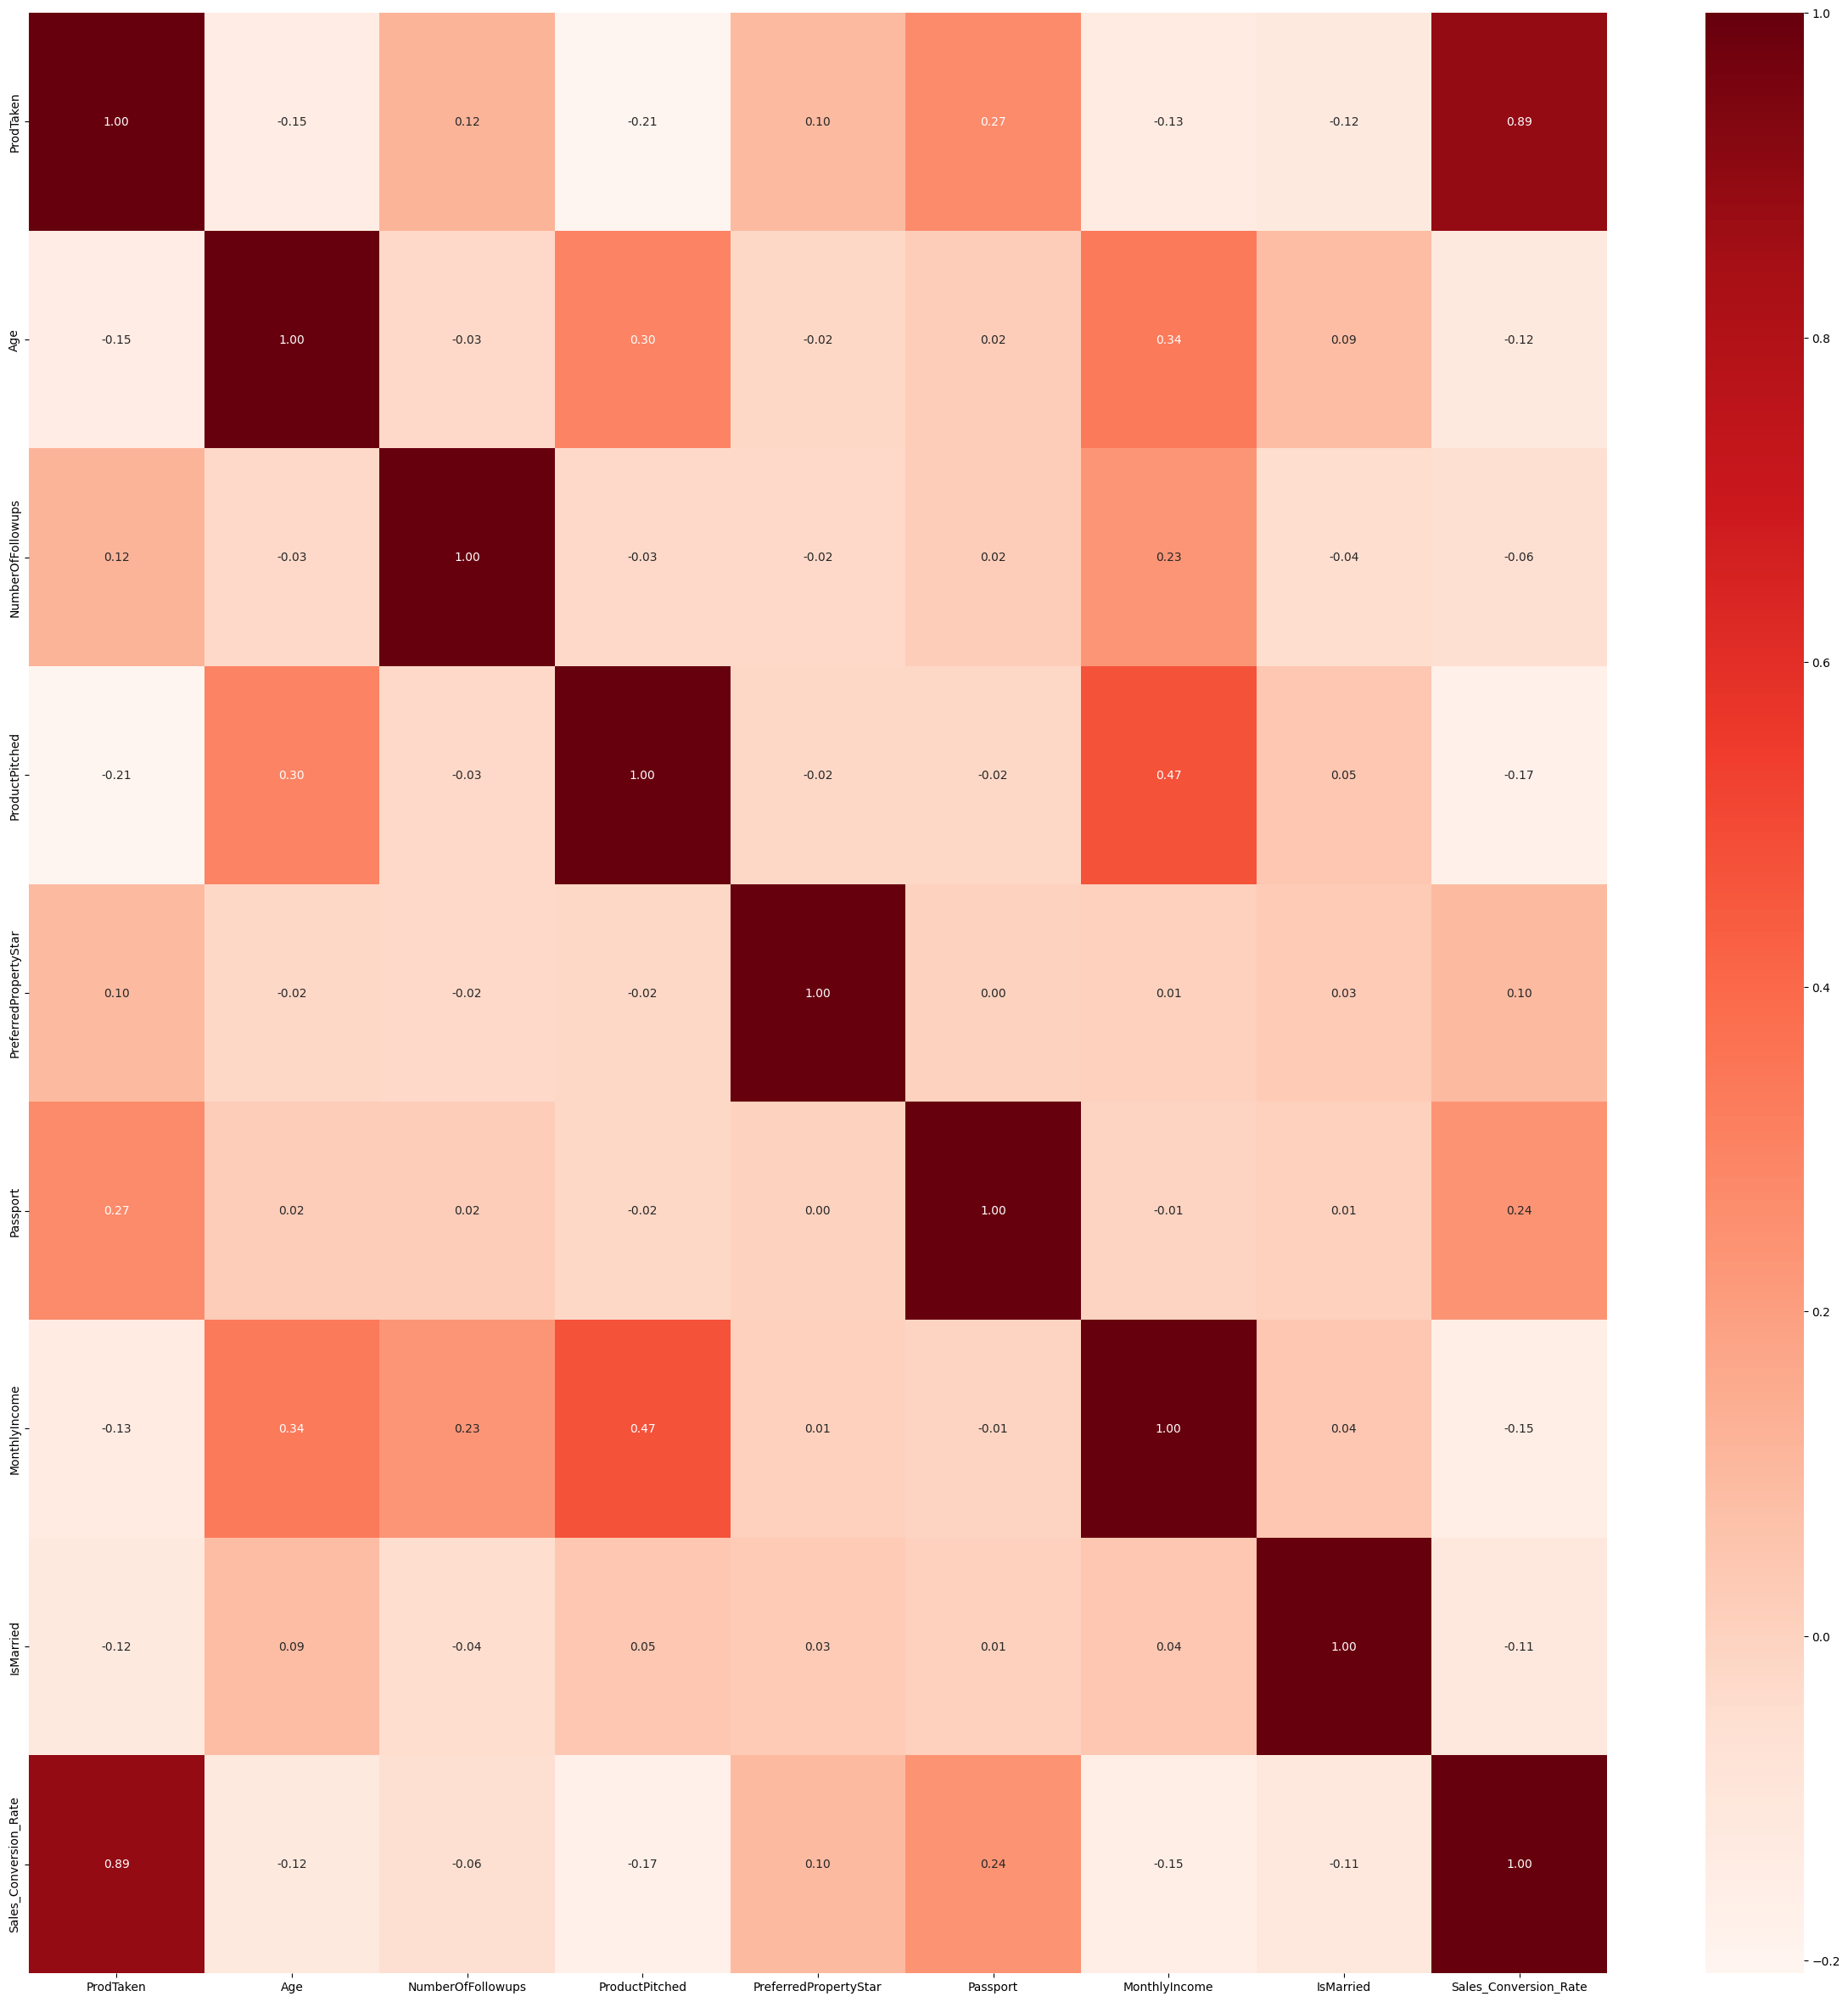

In [118]:
#Korelasi

plt.figure(figsize=(30, 30))
sns.heatmap(df_drop.corr(), cmap='Reds', annot=True, fmt='.2f')

In [119]:
# Split Data
# pemisahan features vs target
X = df_drop.drop('ProdTaken', axis=1)
y = df_drop['ProdTaken'].values


In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196 entries, 0 to 4887
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4196 non-null   float64
 1   Gender                 4196 non-null   object 
 2   NumberOfFollowups      4153 non-null   float64
 3   ProductPitched         4196 non-null   int64  
 4   PreferredPropertyStar  4196 non-null   float64
 5   Passport               4196 non-null   int64  
 6   MonthlyIncome          4196 non-null   float64
 7   IsMarried              4196 non-null   int64  
 8   Sales_Conversion_Rate  4153 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 456.9+ KB


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Feature Transformation

# **MACHINE LEARNING MODELLING & EVALUATION**

In [ ]:
# CODE